In [141]:
#coding utf-8

# Altere esse variável para definir a imagem a ser avaliada. 
# A imagem deve ser uma microestrutura bifásica.
# A imagem padrão é uma Micrografia de Ferro Cinzento. Vá à 4a célula para acompanhar o funcionamento
# detalhado do programa. Na última célula temos o resultado da análise.
NOME_DA_IMAGEM_A_SER_ANALISADA = "FromDoItPoms000288.jpg"
NOME_DA_FASE_ESCURA = "Perlita"
NOME_DA_FASE_CLARA  = "Cementita"


# Set UP
get_ipython().magic('matplotlib inline')

import math
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, data
from skimage.util import random_noise
from skimage.filters import gaussian, median
from skimage.morphology import disk
from skimage.io import imread
from collections import Counter


import os
from skimage import io

# função de convolução bidimensional, vamos referenciar a função pelo
# apelido conv2
from scipy.signal import convolve2d as conv2





In [142]:
def mostra_imagem_cinza(data):
  """Uma função auxiliar para exibir uma imagem em níveis de cinza"""
  f = plt.figure()
  ax_img = f.gca()
  ax_img.imshow(data, cmap=plt.cm.gray)
  ax_img.set_axis_off()
  return (f, ax_img)


def preencher(matriz, linhas=-1, colunas=-1):
    """Cria uma nova matriz, de dimensoes maiores que a matriz passada como entrada, e preenchendo os novos
    elementos com zero."""
    rows, cols = matriz.shape
    if(linhas < 0 and colunas < 0):
        linhas, colunas = (2*rows, 2*cols)
    if(rows > linhas or cols > colunas):
        raise ValueError("Novas dimensões (%d, %d) são menores que as anteriores (%d, %d)" % (linhas, colunas, rows, cols))
    res = np.zeros((linhas, colunas), dtype=matriz.dtype)
    res[0:rows, 0:cols] = matriz
    return res

In [143]:
def load_image(img_name):
    #filename = os.path.join(skimage.data_dir, img_name)
    #print(filename)
    return io.imread(img_name)

def imagem_cinza(imagem_colorida):
    return color.rgb2gray(imagem)

def passa_baixo(imagem, valor):
    linhas, colunas = imagem.shape
    matrizUns = np.ones((linhas, colunas), dtype=float)
    cor_media = valor*matrizUns
    return imagem > cor_media

def gera_matriz(dimensao):
    return np.ones((dimensao, dimensao), dtype=np.float32)/(dimensao*dimensao)

def histograma(imagem):
    freq = Counter(np.array(imagem).flatten())
    return freq
def conta_pixel_por_valor(imagem, valor=255):
    freq = Counter(np.array(imagem).flatten())
    return freq[valor]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x103edc50>)

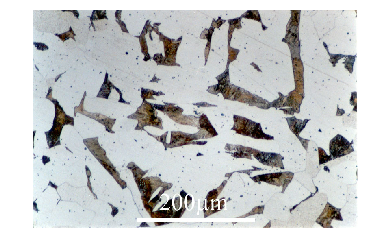

In [144]:
# A imagem base a ser analisada é a "FromDoItPoms000288.jpg". 
# Essa imagem foi obtida de: https://www.doitpoms.ac.uk/miclib/full_record.php?id=288
micrografia_colorida = load_image(NOME_DA_IMAGEM_A_SER_ANALISADA)

# Ela pode ser observada abaixo:
mostra_imagem_cinza(micrografia_colorida)

# O objetivo desse Quantificador é calcular a quantidade de Cementita e de
# Perlita existente na amostra estudada. Através da Estereologia Quantitativa,
# sabemos que a quantidade de cada uma dessas fases no material é proporcional à quantidade
# das fases na amostra.

# A Cementita é a fase cinzenta do material.
# A Perlita é a fase escura.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10439198>)

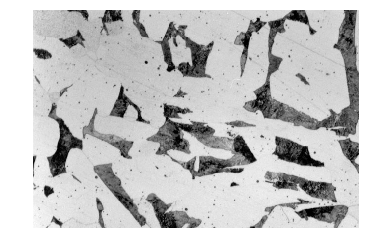

In [145]:
# Trabalharemos com a imagem em níveis de cinza, pois as cores são irrelevantes.
img_cinza = color.rgb2gray(micrografia_colorida)

# Iremos retirar a parte debaixo da imagem, onde consta a legenda, para que ela
# não atrapalhe nossa contagem. 
linhas,colunas = img_cinza.shape

crop_ratio = 0.83
linhas = math.floor(linhas*crop_ratio)
colunas = math.floor(colunas*crop_ratio)

imagem_cortada = img_cinza[0:linhas, 0:colunas]


mostra_imagem_cinza(imagem_cortada)



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1033f438>)

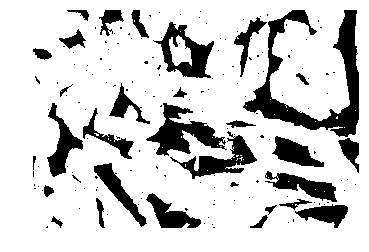

In [146]:
# Agora iremos separar a imagem. Todos os pixels com mais de 60% de intensidade serão brancos,
# todos os pixels com intensidade menor que 60% serão pretos.
corte_de_intensidade = 0.6
im_dual = passa_baixo(imagem_cortada, corte_de_intensidade)
mostra_imagem_cinza(im_dual)

# Note que há pontos brancos dentro das áreas pretas, e pontos pretos nas áreas brancas. Nós 
# NÃO queremos removê-los, pois se tratam de impurezas(e não ruído).

In [150]:
# Agora, podemos utilizar uma simples contagem de pixels e determinar a quantidade de cada fase:
# Fase Escura: Contagem de pixels pretos.
# Fase Clara: Contagem de pixels brancos.

fase_escura = conta_pixel_por_valor(im_dual, 0)
fase_clara = conta_pixel_por_valor(im_dual, 1.0)
numero_total_de_pontos = fase_escura+fase_clara

fase_escura = 100*fase_escura/numero_total_de_pontos
fase_clara = 100*fase_clara/numero_total_de_pontos

print("Essa micrografia apresenta cerca de \n\t%.2f%%  de %s \n\t%.2f%%  de %s." %(fase_clara, NOME_DA_FASE_CLARA, fase_escura, NOME_DA_FASE_ESCURA));


Essa micrografia apresenta cerca de 
	75.16%  de Cementita 
	24.84%  de Perlita.
